# Constrained Local Models - Basics
The aim of this notebook is to showcase how one can build and fit CLMs to images using ``menpofit``.

Note that this notebook assumes that the user has previously gone through the AAMs Basics notebook and he/she is already familiar with the basics of `Menpo`'s Deformable Model Fitting framework explained in there.

## 1. Loading data

In [1]:
%matplotlib inline
from pathlib import Path


path_to_lfpw = Path('/vol/atlas/databases/lfpw')
path_to_lfpw = Path('/Users/pts08/data/lfpw')

In [2]:
import menpo.io as mio

training_images = []
# load landmarked images
for i in mio.import_images(path_to_lfpw / 'trainset' / '*', verbose=True):
    # crop image
    i = i.crop_to_landmarks_proportion(0.1)
    # convert it to grayscale if needed
    if i.n_channels == 3:
        i = i.as_greyscale(mode='luminosity')
    # append it to the list
    training_images.append(i)

Importing assets: [==========] 100% (811/811) - done.                           


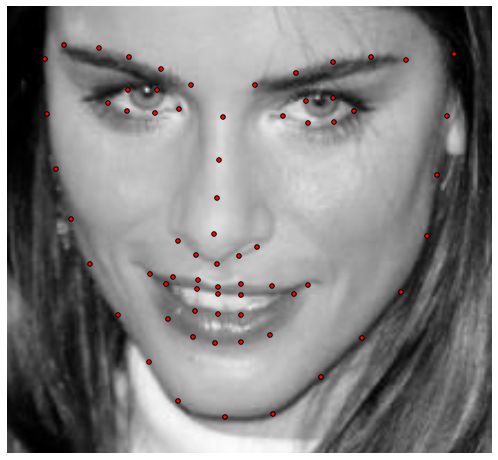

In [3]:
from menpowidgets import visualize_images

visualize_images(training_images)

## 2. Build a CLM with default parameters

Building a CLM using `Menpo` can be done using a single line of code.

In [4]:
from menpofit.clm import CLM


clm = CLM(
    training_images, 
    verbose=True,
    group='PTS',
    diagonal=200
)

- Computing reference shape                                                     Computing batch 0
- Training models
  - Scale 0: Done
  - Scale 1: Done
                                                              

In [5]:
print(clm)

Constrained Local Model
 - Images scaled to diagonal: 200.00
 - Scales: [0.5, 1]
  - Scale 0.5
   - Holistic feature: no_op
   - Shape model class: OrthoPDM
   - 132 shape components
   - Expert ensemble class: CorrelationFilterExpertEnsemble
    - 68 experts
    - Patch shape: (17, 17)
  - Scale 1
   - Holistic feature: no_op
   - Shape model class: OrthoPDM
   - 132 shape components
   - Expert ensemble class: CorrelationFilterExpertEnsemble
    - 68 experts
    - Patch shape: (17, 17)
        


## 3. Fit the previous CLM

In `Menpo`, CLMs can be fitted to images by creating `Fitter` objects around them. 

One of the most popular algorithms for fitting CLMs is the `Regularized Landmark Mean-Shift` algorithm. In order to fit our CLM using this algorithm using `Menpo`, the user needs to define a `GradientDescentCLMFitter` object. This can be done again using a single line of code!!!

In [6]:
from menpofit.clm import GradientDescentCLMFitter

fitter = GradientDescentCLMFitter(clm, n_shape=[6, 12])

Fitting a `GradientDescentCLMFitter` to an image is as simple as calling its `fit` method. Let's try it by fitting some images of the LFPW database test set!!!

In [7]:
import menpo.io as mio

# load test images
test_images = []
for i in mio.import_images(path_to_lfpw / 'testset' / '*.png', max_images=5, verbose=True):
    # crop image
    i = i.crop_to_landmarks_proportion(0.5)
    # convert it to grayscale if needed
    if i.n_channels == 3:
        i = i.as_greyscale(mode='luminosity')
    # append it to the list
    test_images.append(i)

Importing assets: [==========] 100% (5/5) - done.                               


Note that for the purpose of this simple fitting demonstration we will just fit the first 5 images of the LFPW test set.

In [8]:
fitting_results = []

for i in test_images:
    gt_s = i.landmarks['PTS'].lms
    # generate perturbed landmarks
    s = fitter.perturb_from_bb(gt_s, gt_s.bounding_box())
    # fit image
    fr = fitter.fit_from_shape(i, s, gt_shape=gt_s) 
    fitting_results.append(fr)

    # print fitting error
    print(fr)

Initial error: 0.0573
Final error: 0.0172
Initial error: 0.0293
Final error: 0.0193
Initial error: 0.0568
Final error: 0.0303
Initial error: 0.0326
Final error: 0.0236
Initial error: 0.0542
Final error: 0.0336


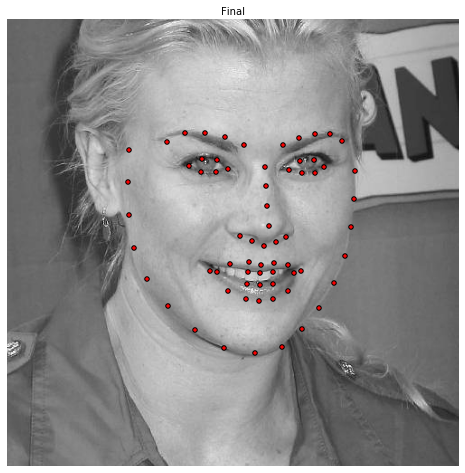

In [9]:
from menpowidgets import visualize_fitting_result

visualize_fitting_result(fitting_results)